# Creating ANN using Pytorch

In [1]:
import pandas as pd
import seaborn as sb

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

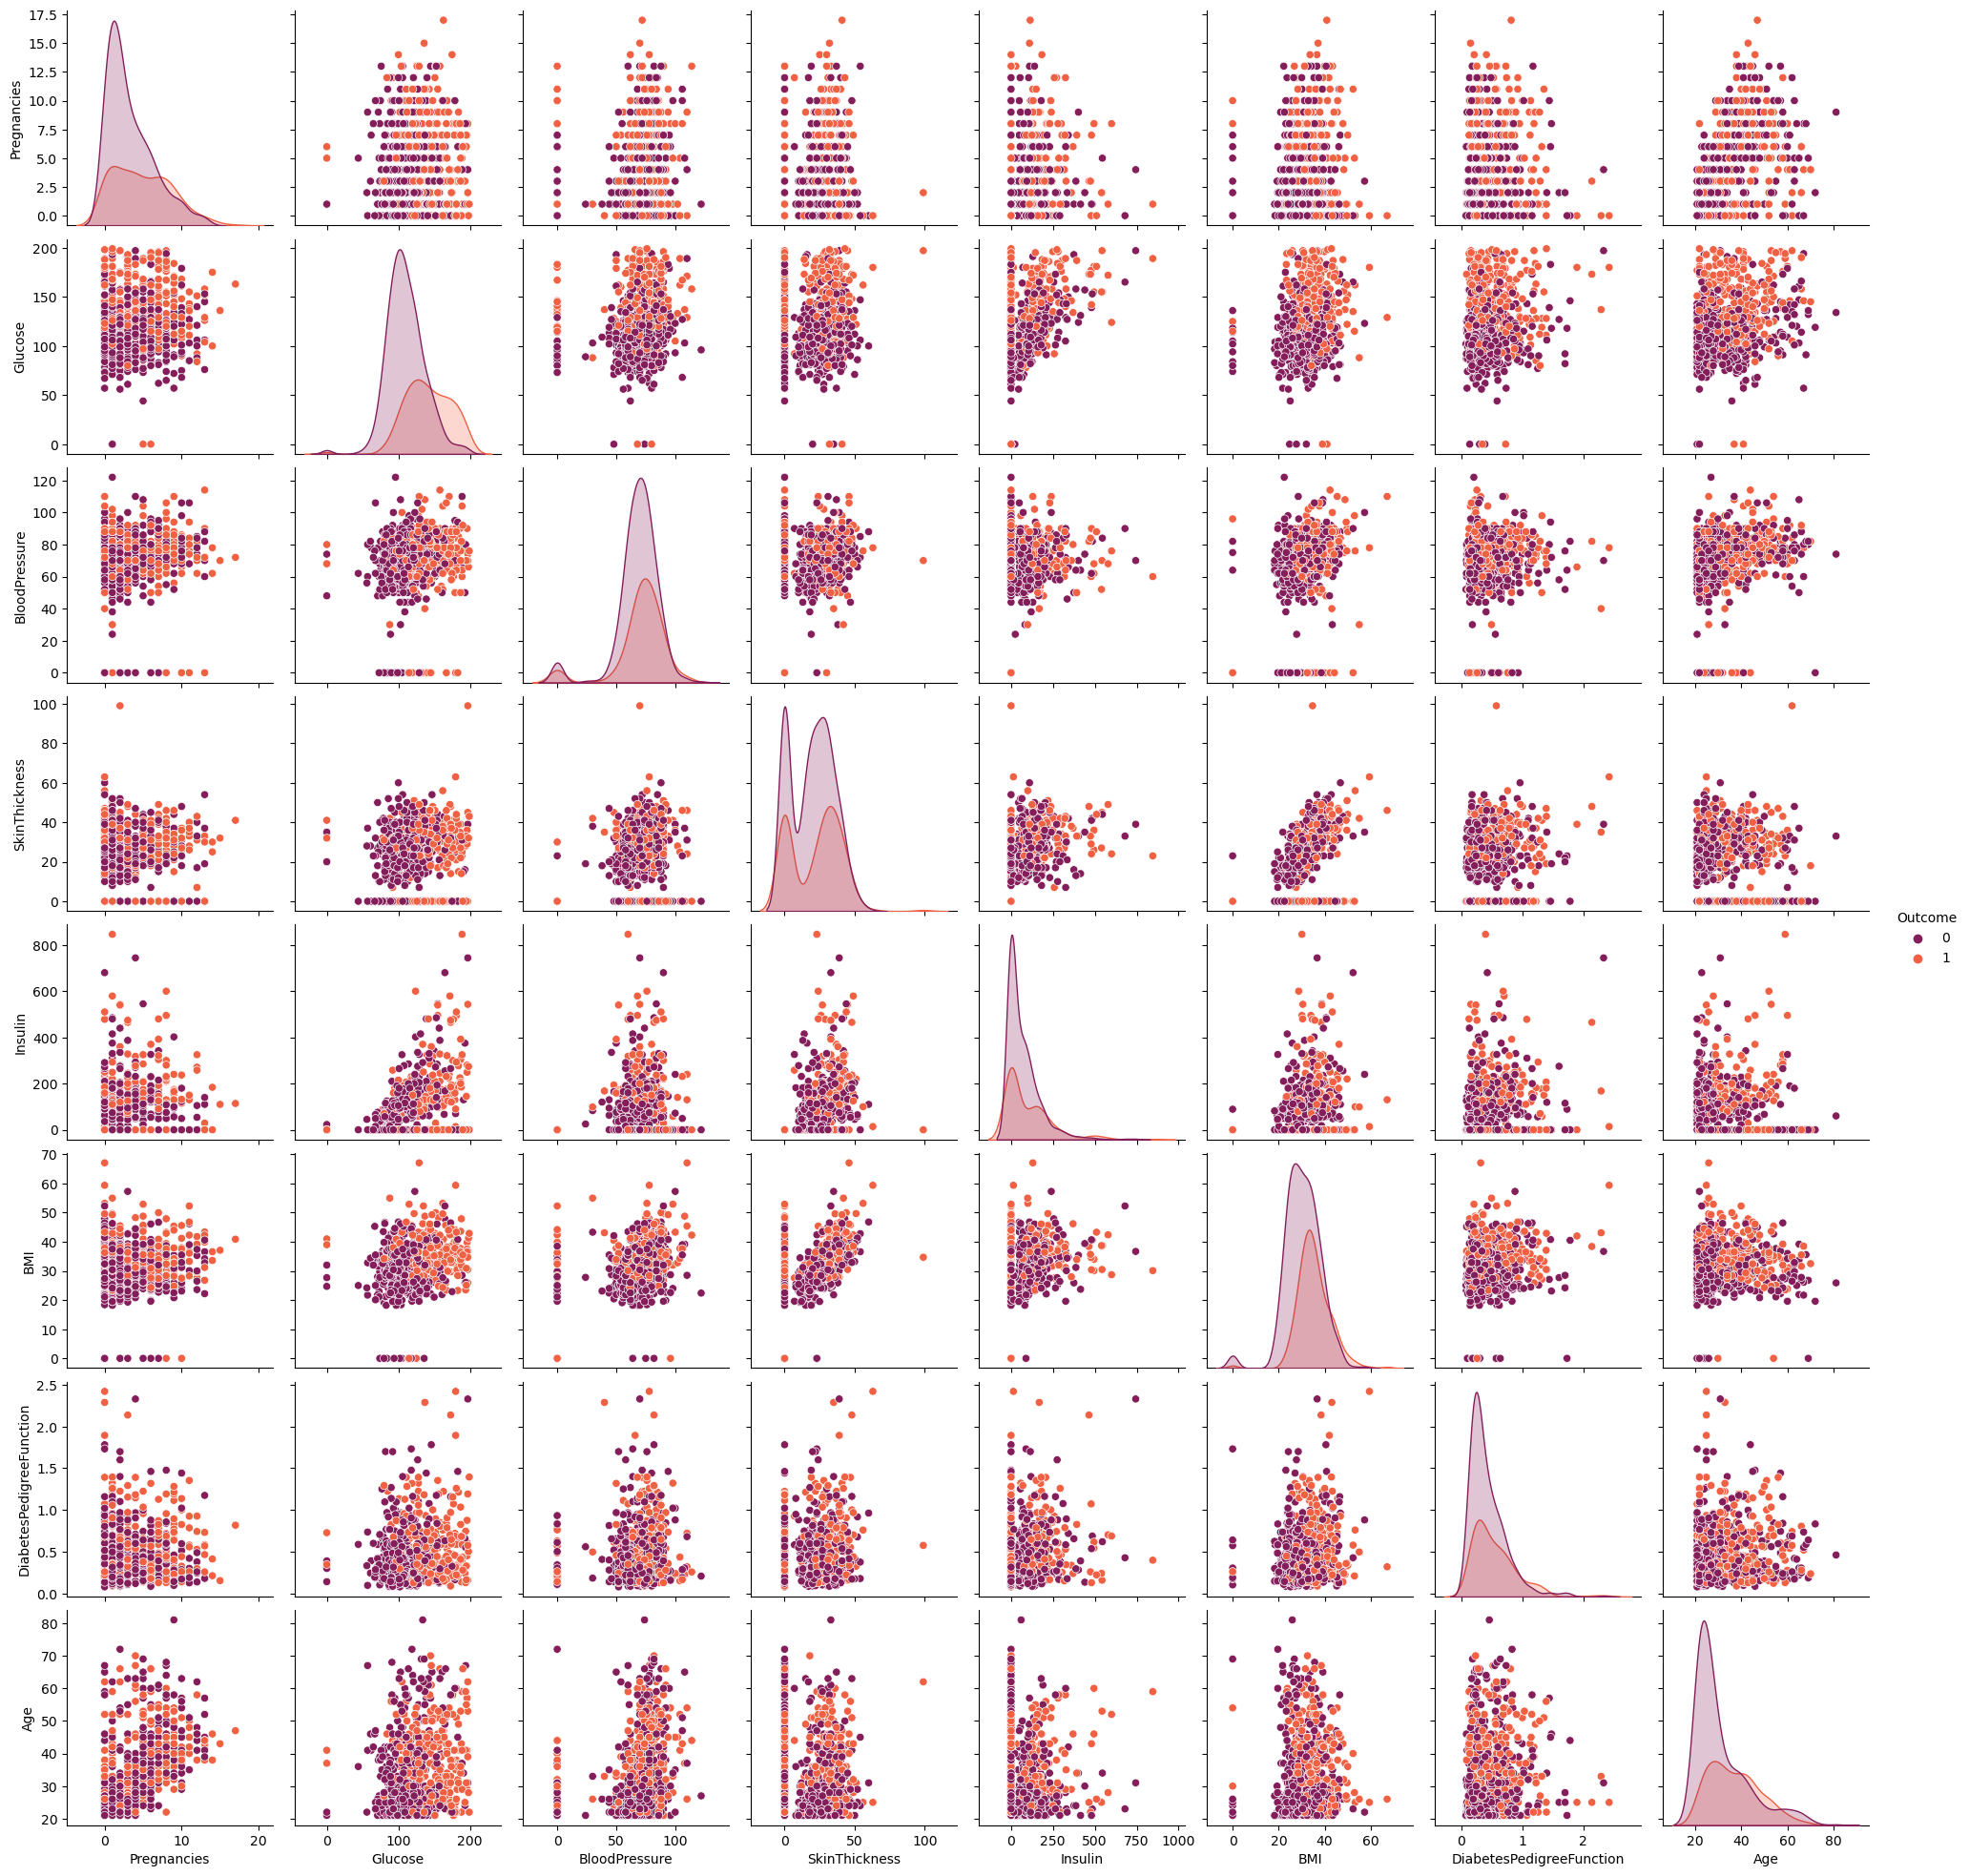

In [8]:
sb.pairplot(data,hue="Outcome",palette="rocket")

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
x_ind=data.drop('Outcome',axis=1).values #if we want values just add (.values)

In [13]:
y_dep =data['Outcome'].values

In [14]:
x_ind

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [15]:
y_dep

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=2)

In [17]:
x_train

array([[1.000e+00, 1.240e+02, 7.400e+01, ..., 2.780e+01, 1.000e-01,
        3.000e+01],
       [1.000e+00, 9.500e+01, 8.200e+01, ..., 3.500e+01, 2.330e-01,
        4.300e+01],
       [0.000e+00, 9.400e+01, 7.000e+01, ..., 4.350e+01, 3.470e-01,
        2.100e+01],
       ...,
       [4.000e+00, 1.250e+02, 7.000e+01, ..., 2.890e+01, 1.144e+00,
        4.500e+01],
       [3.000e+00, 1.160e+02, 7.400e+01, ..., 2.630e+01, 1.070e-01,
        2.400e+01],
       [4.000e+00, 1.100e+02, 6.600e+01, ..., 3.190e+01, 4.710e-01,
        2.900e+01]])

In [18]:
x_test

array([[  2.   ,  88.   ,  74.   , ...,  29.   ,   0.229,  22.   ],
       [  2.   , 129.   ,  84.   , ...,  28.   ,   0.284,  27.   ],
       [  0.   , 102.   ,  78.   , ...,  34.5  ,   0.238,  24.   ],
       ...,
       [  0.   , 132.   ,  78.   , ...,  32.4  ,   0.393,  21.   ],
       [  5.   , 137.   , 108.   , ...,  48.8  ,   0.227,  37.   ],
       [  1.   ,  73.   ,  50.   , ...,  23.   ,   0.248,  21.   ]])

In [19]:
y_train

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [20]:
y_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

# Creating Tensors

In [21]:
#libraries from pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [24]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [26]:
x_train

tensor([[1.0000e+00, 1.2400e+02, 7.4000e+01,  ..., 2.7800e+01, 1.0000e-01,
         3.0000e+01],
        [1.0000e+00, 9.5000e+01, 8.2000e+01,  ..., 3.5000e+01, 2.3300e-01,
         4.3000e+01],
        [0.0000e+00, 9.4000e+01, 7.0000e+01,  ..., 4.3500e+01, 3.4700e-01,
         2.1000e+01],
        ...,
        [4.0000e+00, 1.2500e+02, 7.0000e+01,  ..., 2.8900e+01, 1.1440e+00,
         4.5000e+01],
        [3.0000e+00, 1.1600e+02, 7.4000e+01,  ..., 2.6300e+01, 1.0700e-01,
         2.4000e+01],
        [4.0000e+00, 1.1000e+02, 6.6000e+01,  ..., 3.1900e+01, 4.7100e-01,
         2.9000e+01]])

In [27]:
y_test

tensor([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [28]:
y_train

tensor([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,

In [29]:
x_test

tensor([[  2.0000,  88.0000,  74.0000,  ...,  29.0000,   0.2290,  22.0000],
        [  2.0000, 129.0000,  84.0000,  ...,  28.0000,   0.2840,  27.0000],
        [  0.0000, 102.0000,  78.0000,  ...,  34.5000,   0.2380,  24.0000],
        ...,
        [  0.0000, 132.0000,  78.0000,  ...,  32.4000,   0.3930,  21.0000],
        [  5.0000, 137.0000, 108.0000,  ...,  48.8000,   0.2270,  37.0000],
        [  1.0000,  73.0000,  50.0000,  ...,  23.0000,   0.2480,  21.0000]])

In [32]:
data.shape

(768, 9)

# creating model with the help of Pytorch

In [39]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x
    
    

In [41]:
#iniate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [43]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [44]:
#BackWard Propogation- Define the loss_function, define the optimizer

In [45]:
loss_function=nn.CrossEntropyLoss()

In [51]:
loss_function
optimizer=torch.optim.Adam(model.parameters(),lr=0.1,)

In [52]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    weight_decay: 0
)

In [57]:
epochs=500
final_loses=[]
for i in range(epochs):
    i=i+1
    pred=model.forward(x_train)
    loss=loss_function(pred,y_train)
    final_loses.append(loss)
    if i%10==1:
        print("Epoch Number :{} and the loss is :".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch Number :1 and the loss is :
Epoch Number :11 and the loss is :
Epoch Number :21 and the loss is :
Epoch Number :31 and the loss is :
Epoch Number :41 and the loss is :
Epoch Number :51 and the loss is :
Epoch Number :61 and the loss is :
Epoch Number :71 and the loss is :
Epoch Number :81 and the loss is :
Epoch Number :91 and the loss is :
Epoch Number :101 and the loss is :
Epoch Number :111 and the loss is :
Epoch Number :121 and the loss is :
Epoch Number :131 and the loss is :
Epoch Number :141 and the loss is :
Epoch Number :151 and the loss is :
Epoch Number :161 and the loss is :
Epoch Number :171 and the loss is :
Epoch Number :181 and the loss is :
Epoch Number :191 and the loss is :
Epoch Number :201 and the loss is :
Epoch Number :211 and the loss is :
Epoch Number :221 and the loss is :
Epoch Number :231 and the loss is :
Epoch Number :241 and the loss is :
Epoch Number :251 and the loss is :
Epoch Number :261 and the loss is :
Epoch Number :271 and the loss is :
Epo

In [59]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(x_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 0.6305215358734131
Epoch number: 11 and the loss : 0.6302700042724609
Epoch number: 21 and the loss : 0.6297395825386047
Epoch number: 31 and the loss : 0.6294519901275635
Epoch number: 41 and the loss : 0.6296772956848145
Epoch number: 51 and the loss : 0.6298277974128723
Epoch number: 61 and the loss : 0.633162260055542
Epoch number: 71 and the loss : 0.6310193538665771
Epoch number: 81 and the loss : 0.6305428147315979
Epoch number: 91 and the loss : 0.6330738663673401
Epoch number: 101 and the loss : 0.6321403384208679
Epoch number: 111 and the loss : 0.6305748820304871
Epoch number: 121 and the loss : 0.6299996376037598
Epoch number: 131 and the loss : 0.6298571228981018
Epoch number: 141 and the loss : 0.6298198103904724
Epoch number: 151 and the loss : 0.6296693086624146
Epoch number: 161 and the loss : 0.6296769380569458
Epoch number: 171 and the loss : 0.6299729347229004
Epoch number: 181 and the loss : 0.6295517086982727
Epoch number: 191 and th

In [61]:
!pip install matplotlib

In [64]:
#plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
# plt.plot(range(epochs),final_losses)
# plt.ylabel('Loss')
# plt.xlabel('Epoch')

In [79]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(x_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
1
1
1
0
0
1
0
0
1
1
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0


In [81]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predictions,y_test)

In [82]:
cm

array([[88, 34],
       [21, 11]])

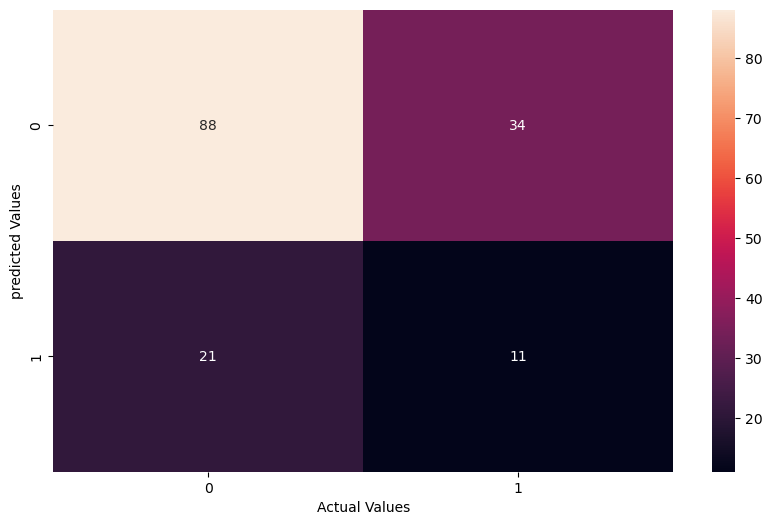

In [91]:
plt.figure(figsize=(10,6))
sb.heatmap(cm,annot=True)

plt.xlabel('Actual Values')
plt.ylabel('predicted Values')
plt.show()

In [83]:
from sklearn.metrics import accuracy_score


In [85]:
acc=accuracy_score(predictions,y_test)

In [86]:
acc

0.6428571428571429

In [92]:
##Save the model 
torch.save(model,"diabetes.pt")

In [95]:
#save and load
model=torch.load("diabetes.pt")

In [96]:
model.eval

<bound method Module.eval of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [97]:
#prediction of new data point

In [106]:
list=[6.0,130.0,72.0,40.0,25.6,45.0,0.0,]

In [107]:
new_data=torch.tensor(list)

In [108]:
new_data

tensor([  6.0000, 130.0000,  72.0000,  40.0000,  25.6000,  45.0000,   0.0000])

In [112]:
# with torch.no_grad():
#     print(model(new_data))
#     print(model(new_data).argmax().item())
